In [7]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from common import *
import statsmodels.api as sm

plt.style.use("seaborn")

# Loading CSV files from local storage
nba = get_baseline_data('cleaned.csv')
X = nba[['MP', 'PTS', 'Age', 'games_started', 'PER', 'AST', 'STL', 'TRB', '3P']]
y = nba[['inflationAdjSalary_log']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(x_train.size)
print(x_train.head())
x_train = x_train.to_numpy()
print(x_train[:5,:])
print(x_train.size)
y_train = np.mat(y_train)
y_test = np.mat(y_test)
x_test = np.mat(x_test)
X_train = generate_polynomial_features(x_train, M=x_train.size[1])

# # Scatter plot of data
fig, ax = plt.subplots(figsize=(10, 7))

# ax.set_title("Locally weighted linear regression")
# ax.set(xlabel='x', ylabel='y')
# ax.scatter(x_train, y_train, marker='.', c='black')

#
# The ordinary linear regression
# #
# w_linear = closed_form(X_train, y_train)

# x_space = np.linspace(x_train.min(), x_train.max(), num=50)
# ax.plot(x_space,
#         x_space * w_linear[1] + w_linear[0],
#         c='gray', linestyle='--', label='linear', linewidth=3)

#
# Locally-weighted linear regression
#\
def gen_r_train (qp, x, tau) :
    res = np.zeros(x.shape[0])
    for i in range(0, x.shape[0]) :
        ri = np.exp((qp - x[i])**2/(-2*tau**2))
        res[i] = ri
    return res

taus = [0.1, 0.3, 0.8, 2.0, 10.0]
colors = ['red', 'orange', 'green', 'blue', 'magenta']
for color, tau in zip(colors, taus):

    #############################################################################
    # TODO: Implement the plot for 2(g)
    #############################################################################
    y_space = []

    for qp in x_test :
        r_train = gen_r_train(qp, x_train, tau)
        w_linear_c = closed_form_locally_weighted(X_train, y_train, r_train)
        y_space.append(qp* w_linear_c[1] + w_linear_c[0])

    #############################################################################
    #                          END OF YOUR CODE                                 #
    #############################################################################

    ax.plot(y_test, y_space - y_test,
            c=color, label=f'tau={tau}', linewidth=2)

ax.legend()
ax.grid()
plt.show()

55233
          MP     PTS   Age  games_started   PER    AST    STL    TRB     3P
4255  2717.0  1136.0  28.0           78.0  16.5  514.0  118.0  279.0  139.0
5301  2319.0  1107.0  22.0           60.0  19.8   88.0   48.0  756.0    0.0
7240   464.0   163.0  23.0            0.0  10.1    9.0    8.0  101.0    0.0
1664    35.0    10.0  28.0            0.0   8.3    0.0    0.0    8.0    0.0
4147  2304.0  1054.0  25.0           25.0  18.9  166.0   32.0  616.0   17.0
[[2717.  1136.    28.    78.    16.5  514.   118.   279.   139. ]
 [2319.  1107.    22.    60.    19.8   88.    48.   756.     0. ]
 [ 464.   163.    23.     0.    10.1    9.     8.   101.     0. ]
 [  35.    10.    28.     0.     8.3    0.     0.     8.     0. ]
 [2304.  1054.    25.    25.    18.9  166.    32.   616.    17. ]]
55233


C:\Users\mmart\AppData\Local\Temp\ipykernel_29632\407738190.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
c:\Users\mmart\Programming\EECS545\project\EECS-545---Predicting-NBA-Player-s-Salary\common.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace('$', '')
c:\Users\mmart\Programming\EECS545\project\EECS-545---Predicting-NBA-Player-s-Salary\common.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

TypeError: 'int' object is not subscriptable

55233
6137


ValueError: x and y must be the same size

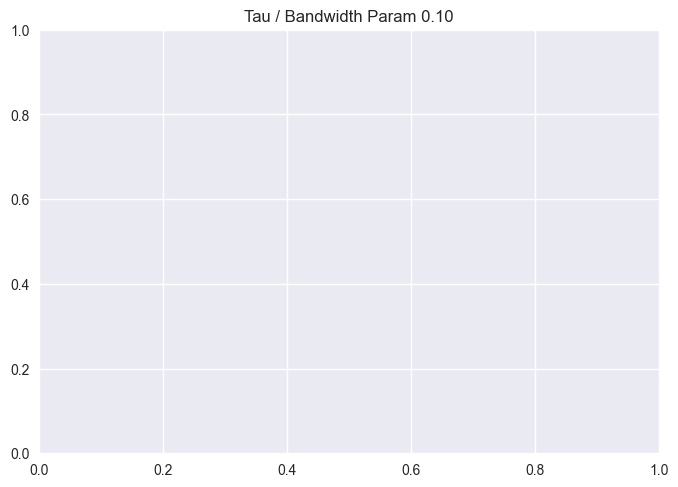

In [7]:
print(X.size)
print(Y.size)
horizontal_axis = np.array(X)
vertical_axis = np.array(Y)
plt.title("Tau / Bandwidth Param %.2f"% Bandwidth)
plt.scatter(horizontal_axis, vertical_axis)
Y_pred = np.array(y_pred)
plt.scatter(X_test, Y_pred, color ='red')
plt.scatter(X_test, y_test, color='blue')
plt.show()